## Imports

In [4]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

In [9]:
from sklearn.feature_selection import RFE

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.preprocessing import LabelEncoder
import math

In [90]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
from sklearn.model_selection import KFold

In [14]:
supply_data = pd.read_csv("supply_chain_data.csv")

In [15]:
supply_data.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

## Data Preprocessing

In [16]:
supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [17]:
#Missing values
supply_data.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [18]:
#Duplicated values
supply_data.duplicated().sum()
supply_data.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

In [19]:
supply_data.columns.str.lower().str.replace(' ', '_')

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')

In [20]:
supply_data = supply_data.rename(columns={'Lead times': 'customer_lead_time', 'Lead time': 'supplier_lead_time'})

In [21]:
supply_data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'customer_lead_time', 'Order quantities',
       'Shipping times', 'Shipping carriers', 'Shipping costs',
       'Supplier name', 'Location', 'supplier_lead_time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [22]:
supply_data.columns = supply_data.columns.str.lower().str.replace(' ', '_')

In [23]:
supply_data.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'customer_lead_time', 'order_quantities',
       'shipping_times', 'shipping_carriers', 'shipping_costs',
       'supplier_name', 'location', 'supplier_lead_time', 'production_volumes',
       'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results',
       'defect_rates', 'transportation_modes', 'routes', 'costs'],
      dtype='object')

### Transforming categorial variables: encoded_supply_data

In [602]:
#labelencoder for product type, sku, customer demographics, location, 
#inspection_results, supplier name, shipping carrier, transportation_modes, routes
le = LabelEncoder()
encoded_supply_data = pd.DataFrame(supply_data)

categorical_columns = [
    'product_type',
    'sku',
    'customer_demographics',
    'shipping_carriers',
    'supplier_name',
    'location',
    'inspection_results',
    'transportation_modes',
    'routes'
]

for col in categorical_columns:
    encoded_supply_data[col] = le.fit_transform(encoded_supply_data[col])

encoded_supply_data.info()
encoded_supply_data[:15]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    int64  
 1   sku                      100 non-null    int64  
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    int64  
 7   stock_levels             100 non-null    int64  
 8   customer_lead_time       100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    int64  
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    int64  
 14  location                 10

product_type  sku      price  availability  number_of_products_sold  \
0              1    0  69.808006            55                      802   
1              2    1  14.843523            95                      736   
2              1   12  11.319683            34                        8   
3              2   23  61.163343            68                       83   
4              2   34   4.805496            26                      871   
5              1   45   1.699976            87                      147   
6              2   56   4.078333            48                       65   
7              0   67  42.958384            59                      426   
8              0   78  68.717597            78                      150   
9              2   89  64.015733            35                      980   
10             2    2  15.707796            11                      996   
11             2    3  90.635460            95                      960   
12             1    4  71.213389            41                      336   
13             2    5  16.160393             5                      249   
14             2    6  99.171329            26                      562   

    revenue_generated  customer_demographics  stock_levels  \
0         8661.996792                      2            58   
1         7460.900065                      0            53   
2         9577.749626                      3             1   
3         7766.836426                      2            23   
4         2686.505152                      2             5   
5         2828.348746                      2            90   
6         7823.476560                      1            11   
7         8496.103813                      0            93   
8         7517.363211                      0             5   
9         4971.145988                      3            14   
10        2330.965802                      2            51   
11        6099.944116                      0            46   
12        2873.741446                      3           100   
13        4052.738416                      1            80   
14        8653.570926                      2            54   

    customer_lead_time  order_quantities  ...  manufacturing_lead_time  \
0                    7                96  ...                       29   
1                   30                37  ...                       30   
2                   10                88  ...                       27   
3                   13                59  ...                       18   
4                    3                56  ...                        3   
5                   27                66  ...                       17   
6                   15                58  ...                       24   
7                   17                11  ...                        1   
8                   10                15  ...                        8   
9                   27                83  ...                       23   
10                  13                80  ...                        5   
11                  23                60  ...                       11   
12                  30                85  ...                        3   
13                   8                48  ...                       10   
14                  29                78  ...                       14   

    manufacturing_costs  inspection_results  defect_rates  \
0             46.279879                   2      0.226410   
1             33.616769                   2      4.854068   
2             30.688019                   2      4.580593   
3             35.624741                   0      4.746649   
4             92.065161                   0      3.145580   
5             56.766476                   0      2.779194   
6              1.085069                   2      1.000911   
7             99.466109                   0      0.398177   
8             11.423027                   2      2.709863   
9             4

### Scaling data: std_supply_data and minmax_supply_data

In [25]:
#Standard scaler (z-score scaling)
std_scaler = StandardScaler()
std_supply_data = pd.DataFrame(encoded_supply_data)

columns_to_scale=['price', 'availability', 'number_of_products_sold',
       'revenue_generated', 'stock_levels','customer_lead_time', 
       'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs',
       'supplier_lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'defect_rates','costs']
std_supply_data[columns_to_scale] = std_scaler.fit_transform(encoded_supply_data[columns_to_scale])

std_supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    int64  
 1   sku                      100 non-null    int64  
 2   price                    100 non-null    float64
 3   availability             100 non-null    float64
 4   number_of_products_sold  100 non-null    float64
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    int64  
 7   stock_levels             100 non-null    float64
 8   customer_lead_time       100 non-null    float64
 9   order_quantities         100 non-null    float64
 10  shipping_times           100 non-null    float64
 11  shipping_carriers        100 non-null    float64
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    int64  
 14  location                 10

In [26]:
#Minmax scaler (z-score scaling)
minmax_scaler = MinMaxScaler()
minmax_supply_data = pd.DataFrame(encoded_supply_data)

columns_to_scale=['price', 'availability', 'number_of_products_sold',
       'revenue_generated', 'stock_levels','customer_lead_time', 
       'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs',
       'supplier_lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'defect_rates','costs']
minmax_supply_data[columns_to_scale] = minmax_scaler.fit_transform(encoded_supply_data[columns_to_scale])

minmax_supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    int64  
 1   sku                      100 non-null    int64  
 2   price                    100 non-null    float64
 3   availability             100 non-null    float64
 4   number_of_products_sold  100 non-null    float64
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    int64  
 7   stock_levels             100 non-null    float64
 8   customer_lead_time       100 non-null    float64
 9   order_quantities         100 non-null    float64
 10  shipping_times           100 non-null    float64
 11  shipping_carriers        100 non-null    float64
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    int64  
 14  location                 10

### Dataset Functions

In [137]:
#Function to get specific columns of data
def convertData(feature_columns, og_data):
    new_data = pd.DataFrame(columns = feature_columns)
    for column in feature_columns:
        new_data[column] = og_data[column]
    return new_data

In [141]:
#Function to split data into training and testing sets, assuming data contains target feature
def getTrainTestSets(data, target):
    x = data
    if target in data:
        x = data.drop(columns=[target])

    y = data[target]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return [x_train, x_test, y_train, y_test]

In [142]:
#Functio to get train and test sets, using Recursive Feature Elimination
def getTrainTestSetsRFE(data, target, rfe):
    x = data
    if target in data:
        x = data.drop(columns=[target])
    y = data[target]
    x = rfe.fit_transform(x, y)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    return [x_train, x_test, y_train, y_test]


In [185]:
def getMetrics(y_test, y_pred):
    rmse = root_mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    return [rmse, r_squared]

In [331]:
#Create a scatter plot with the actual Stocks Levels on the x-axis and the predicted Stocks Levels values on the y-axis
def showTestvsPredictions(y_test, y_pred, xlabel, ylabel, title):
    
    plt.scatter(y_test, y_pred)

    # Plot a regression line to see how well the model has fit the data
    sns.regplot(x=y_test, y=y_pred)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot
    plt.show()

## Correlation Map

In [27]:
#exclude SKU column
corr_supply_data = encoded_supply_data.drop(columns=['sku'])

corr_supply_data.head()

product_type      price  availability  number_of_products_sold  \
0             1  69.808006            55                      802   
1             2  14.843523            95                      736   
2             1  11.319683            34                        8   
3             2  61.163343            68                       83   
4             2   4.805496            26                      871   

   revenue_generated  customer_demographics  stock_levels  customer_lead_time  \
0        8661.996792                      2            58                   7   
1        7460.900065                      0            53                  30   
2        9577.749626                      3             1                  10   
3        7766.836426                      2            23                  13   
4        2686.505152                      2             5                   3   

   order_quantities  shipping_times  ...  location  supplier_lead_time  \
0                96               4  ...         4                  29   
1                37               2  ...         4                  23   
2                88               2  ...         4                  12   
3                59               6  ...         3                  24   
4                56               8  ...         2                   5   

   production_volumes  manufacturing_lead_time  manufacturing_costs  \
0                 215                       29            46.279879   
1                 517                       30            33.616769   
2                 971                       27            30.688019   
3                 937                       18            35.624741   
4                 414                        3            92.065161   

   inspection_results  defect_rates  transportation_modes  routes       costs  
0                   2      0.226410                     2       1  187.752075  
1                   2      4.854068                     2       1  503.065579  
2                   2      4.580593                     0       2  141.920282  
3                   0      4.746649                     1       0  254.776159  
4                   0      3.145580                     0       0  923.440632  

[5 rows x 23 columns]

In [28]:
corr_matrix = corr_supply_data.corr()

In [29]:
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r')

fig.update_layout(
    width=800,
    height=800
)

fig.show()

It looks like defect rates is mainly affected by a core group of features: shipping costs, supplier, supplier lead time, production volumes, manufacturing lead time, and manufacturing costs. Production volumes has the highest influence.

## Product Profits and Demand

In [30]:
#Pivot table profit by product type
def get_profit(grouped):
    return (grouped['revenue_generated'].sum()-grouped['costs'].sum())
g1=supply_data.groupby(['product_type']).apply(get_profit).reset_index()
g1 = g1.rename(columns={0:'total_profits'})
print(g1)

g2=supply_data.groupby(['product_type'])['number_of_products_sold'].sum().reset_index()
print(g2)

  product_type  total_profits
0    cosmetics  148154.868716
1     haircare  157126.527741
2     skincare  219398.844065
  product_type  number_of_products_sold
0    cosmetics                    11757
1     haircare                    13611
2     skincare                    20731


/var/folders/lm/l86zt3r51rq7110601lpcfj80000gn/T/ipykernel_79148/2619796679.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



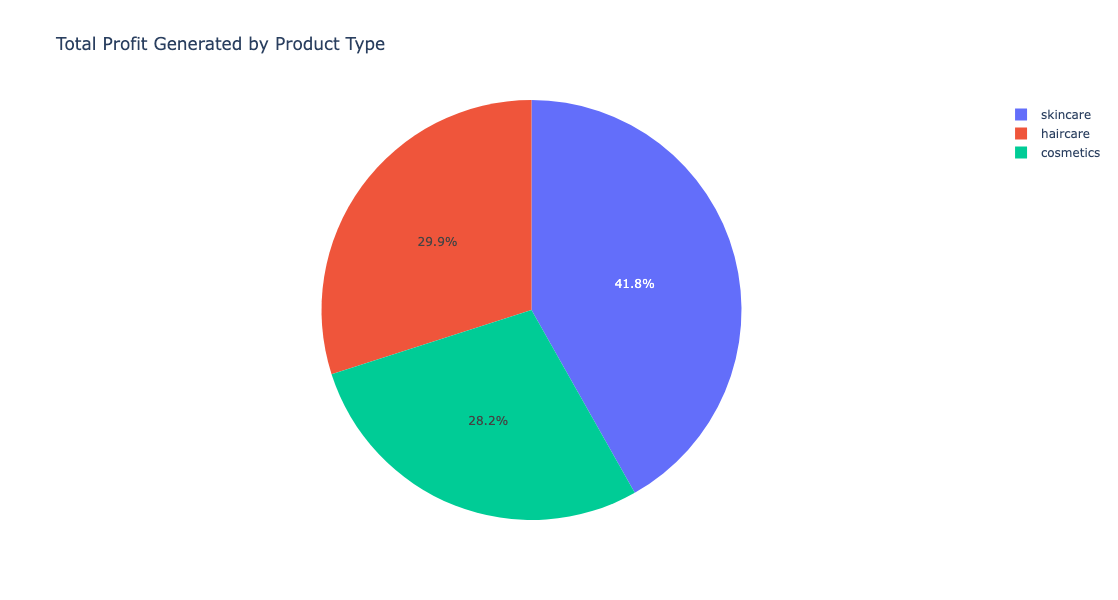

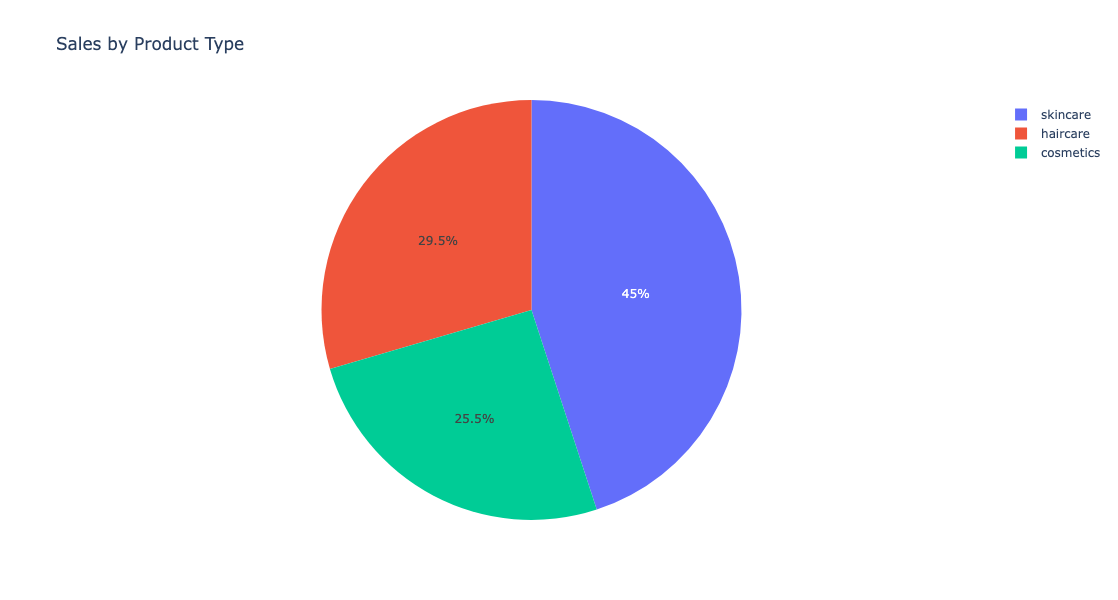

In [31]:
fig = px.pie(
    g1,
    values = 'total_profits',
    names = 'product_type',
    title="Total Profit Generated by Product Type",
    labels={'product_type': 'Product Type', 'total_profits': 'Total Profit'}
)

fig.update_layout(
    width=600,
    height=600
)

fig.show()

fig1 = px.pie(
    g2,
    values = 'number_of_products_sold',
    names = 'product_type',
    title="Sales by Product Type",
    labels={'product_type': 'Product Type', 'number_of_products_sold': 'Total Sales'}
)

fig1.update_layout(
    width=600,
    height=600
)

fig1.show()



Observations
- haircare line makes up significant portion of profits, almost half
- other two lines make up similiar amounts, around 150k
- profit corresponds to larger sales, meaning skincare line results in more revenue overall

/var/folders/lm/l86zt3r51rq7110601lpcfj80000gn/T/ipykernel_79148/1201719111.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



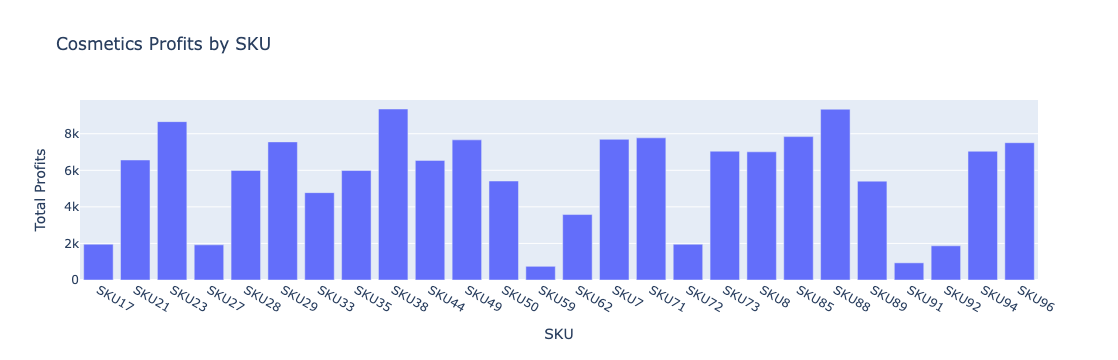

Cosmetics line standard deviation: 2648.887504192397
Most profitable cosmetics sku: SKU38


/var/folders/lm/l86zt3r51rq7110601lpcfj80000gn/T/ipykernel_79148/1201719111.py:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



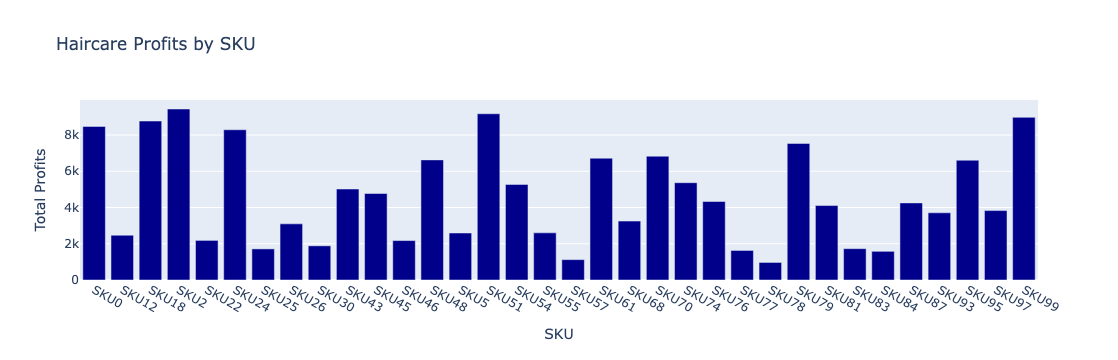

Haircare line standard deviation: 2664.0131624593823
Most profitable haircare sku: SKU2


/var/folders/lm/l86zt3r51rq7110601lpcfj80000gn/T/ipykernel_79148/1201719111.py:43: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



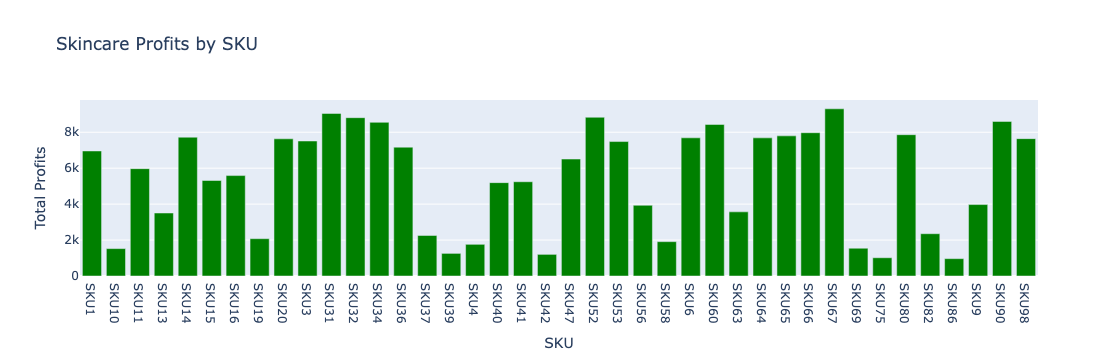

Skincare line standard deviation: 2827.0094384446957
Most profitable skincare sku: SKU67


In [32]:
cosmetics_supply_data = supply_data[supply_data['product_type'] == 'cosmetics']
g3 = cosmetics_supply_data.groupby('sku').apply(get_profit).reset_index()
g3 = g3.rename(columns={0:'total_profits'})

fig = px.bar(g3, 
             x='sku', 
             y='total_profits', 
             title='Cosmetics Profits by SKU', 
             labels={'sku': 'SKU', 'total_profits': 'Total Profits'},
             )
fig.show()

cosmetics_profits_std = g3['total_profits'].std()
print(f"Cosmetics line standard deviation: {cosmetics_profits_std}")

most_prof_cosmetics_sku = g3.loc[g3['total_profits'].idxmax(), 'sku']
print(f"Most profitable cosmetics sku: {most_prof_cosmetics_sku}")

#-------------------------------------------------
haircare_supply_data = supply_data[supply_data['product_type'] == 'haircare']
g4 = haircare_supply_data.groupby('sku').apply(get_profit).reset_index()
g4 = g4.rename(columns={0:'total_profits'})
fig1 = px.bar(g4, 
             x='sku', 
             y='total_profits', 
             title='Haircare Profits by SKU', 
             labels={'total_profits': 'Total Profits', 'sku': 'SKU'},
             )
fig1.update_traces(
    marker_color='darkblue'
)

fig1.show()

haircare_profits_std = g4['total_profits'].std()
print(f"Haircare line standard deviation: {haircare_profits_std}")

most_prof_haircare_sku = g4.loc[g4['total_profits'].idxmax(), 'sku']
print(f"Most profitable haircare sku: {most_prof_haircare_sku}")
#-------------------------------------------------

skincare_supply_data = supply_data[supply_data['product_type'] == 'skincare']
g5 = skincare_supply_data.groupby('sku').apply(get_profit).reset_index()
g5 = g5.rename(columns={0:'total_profits'})
fig2 = px.bar(g5, 
             x='sku', 
             y='total_profits', 
             title='Skincare Profits by SKU', 
             labels={'total_profits': 'Total Profits', 'sku': 'SKU'},
             )
fig2.update_traces(
    marker_color='green'
)

fig2.show()

skincare_profits_std = g5['total_profits'].std()
print(f"Skincare line standard deviation: {skincare_profits_std}")

most_prof_skincare_sku = g5.loc[g5['total_profits'].idxmax(), 'sku']
print(f"Most profitable skincare sku: {most_prof_skincare_sku}")

Observations
- all have significant variance, with the skincare line being slightly higher
- customers buy varying quantities of all skus, there is no dominant
- The most profitable skus are in line with least 3 or more of the other skus
- some skus in each line are underperforming
- Cosmetics: SKUs 17, 59, 91, and 92
- Haircare: SKUs 25, 57, 78
- Skincare: 10, 39, 75, 9

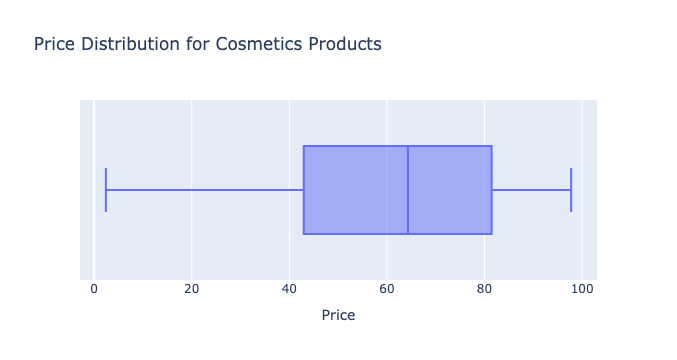

Most profitable sku price: 38    52.075931
Name: price, dtype: float64


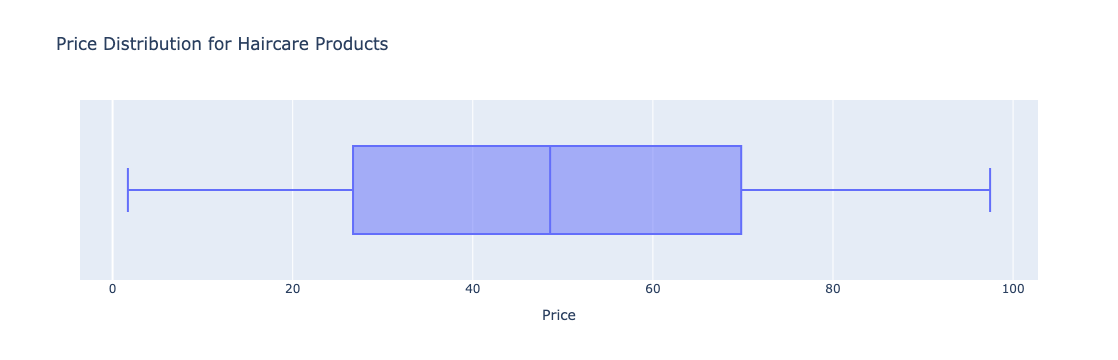

Most profitable sku price: 2    11.319683
Name: price, dtype: float64


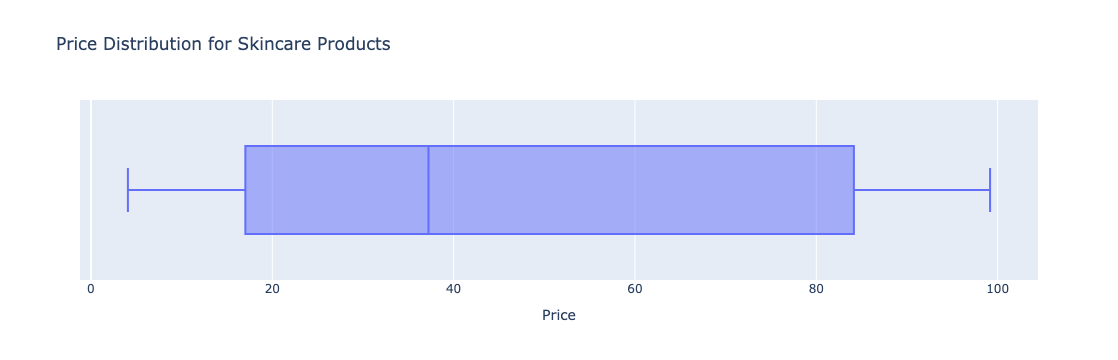

Most profitable sku price: 67    87.755432
Name: price, dtype: float64


In [33]:
fig = px.box(cosmetics_supply_data, 
             x='price',
             title='Price Distribution for Cosmetics Products',
             labels={'price': 'Price'})

fig.show()

cosmetics_sku_price = cosmetics_supply_data[(cosmetics_supply_data['sku'] == most_prof_cosmetics_sku)]['price']
print(f"Most profitable sku price: {cosmetics_sku_price}")

#-----------------------------------
fig1 = px.box(haircare_supply_data, 
             x='price',
             title='Price Distribution for Haircare Products',
             labels={'price': 'Price'})

fig1.show()

haircare_sku_price = haircare_supply_data[(haircare_supply_data['sku'] == most_prof_haircare_sku)]['price']
print(f"Most profitable sku price: {haircare_sku_price}")

fig2 = px.box(skincare_supply_data, 
             x='price',
             title='Price Distribution for Skincare Products',
             labels={'price': 'Price'})

fig2.show()

skincare_sku_price = skincare_supply_data[(skincare_supply_data['sku'] == most_prof_skincare_sku)]['price']
print(f"Most profitable sku price: {skincare_sku_price}")


Observations
- People are willing to pay between 20 to 80 dollars for products, products range from standard to premium
- cosmetics products are overall more expensive with a median of 64, and the most profitable product is a bit lower at 52 (which is between Q1 and Q2). The least variance in terms of core prices as with a difference of about 40.
- Haircare products are more middle-of-the-road with a median of 48. Most profitable product, however, is significantly below Q1.
- Skincare products have the most variance in terms of prices, with Q1 at 17 and Q3 at 84. The outliers aren't as far from the box. Most prices sit lower at 37, however the most profitable product is a premium with the price of 87 which is above Q3.


In terms of what to prioritize with marketing, production, and supplier selection, it's important to understand what the customers are looking for (what stands out to them) that drives to purchase from the company. Tracking spending patterns of product lines can help determine which products are more profitable than others and whether customers favor a certain kind of product so more investment and attention can be given to them. In this situation
- skincare produces significantly more profits that the other lines. This could be main selling point/introduction to the company for many, so it's supply chain would benefit the most from being optimized.
- People are purchasing a variety of products from each line, not focusing solely on a few. This shows that customers value the diversity. It would be interesting to see if certain skus start being preferred as more are added to each line.
- The skincare line has the highest variety of prices, but it looks like the sku that makes the most money is more expensive than the current general price range. Customers are willing to pay more for better products, therefore this line may benefit from a price increase. On the other hand, haircare products might benefit from a cut in production cost and overall price decrease.

### Demand Forecasting

In [372]:
demand_columns = ['product_type', 'sku', 'price', 'availability', 'revenue_generated', 'stock_levels', 'customer_lead_time', 'order_quantities', 'number_of_products_sold']
demand_supply_data = convertData(demand_columns, std_supply_data)
demand_supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    int64  
 1   sku                      100 non-null    int64  
 2   price                    100 non-null    float64
 3   availability             100 non-null    float64
 4   revenue_generated        100 non-null    float64
 5   stock_levels             100 non-null    float64
 6   customer_lead_time       100 non-null    float64
 7   order_quantities         100 non-null    float64
 8   number_of_products_sold  100 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 7.2 KB


In [373]:
demand_xtrain, demand_xtest, demand_ytrain, demand_ytest = getTrainTestSets(demand_supply_data, 
                                                                            'number_of_products_sold')
demand_xtrain.info()
demand_ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        80 non-null     int64  
 1   sku                 80 non-null     int64  
 2   price               80 non-null     float64
 3   availability        80 non-null     float64
 4   revenue_generated   80 non-null     float64
 5   stock_levels        80 non-null     float64
 6   customer_lead_time  80 non-null     float64
 7   order_quantities    80 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 5.6 KB
<class 'pandas.core.series.Series'>
Index: 80 entries, 55 to 51
Series name: number_of_products_sold
Non-Null Count  Dtype  
--------------  -----  
80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


#### Data Exploration

In [374]:
#Dummy Regressor to get Baseline Results
dummy = DummyRegressor(strategy='mean')
dummy.fit(demand_xtrain, demand_ytrain)
dummy_demand_ypred = dummy.predict(demand_xtest)

dummy_rmse = root_mean_squared_error(demand_ytest, dummy_demand_ypred)
dummy_r2 = r2_score(demand_ytest, dummy_demand_ypred)
print("Baseline RMSE:", dummy_rmse)
print("Baseline R-squared:", dummy_r2)

Baseline RMSE: 1.0301345601139875
Baseline R-squared: -0.015897288241561558


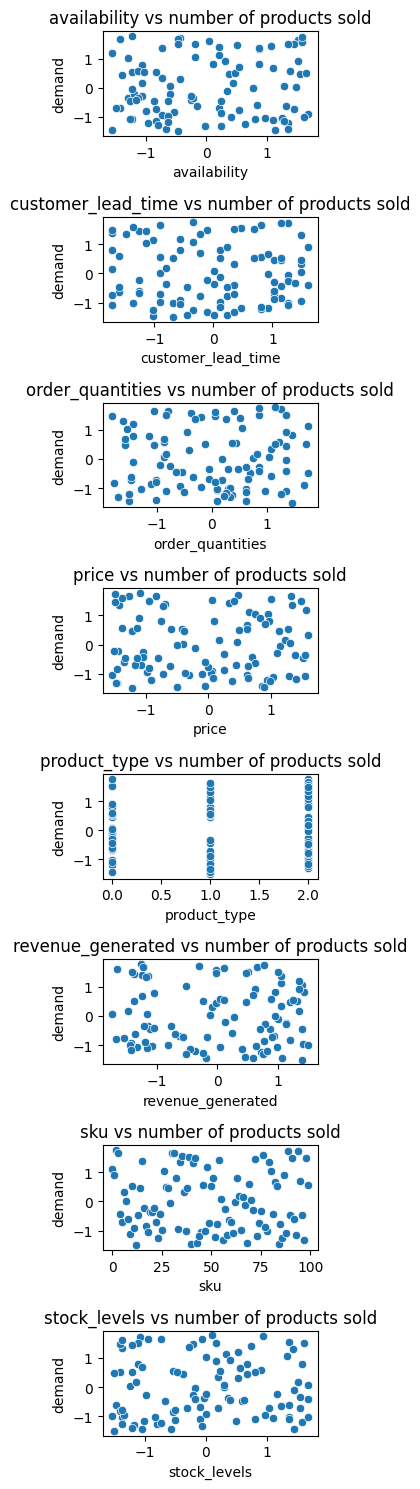

In [375]:
plt.figure(figsize=(3, 15))

# Loop through each feature and create a vertically aligned scatter plot
for i, feature in enumerate(demand_supply_data.columns.difference(['number_of_products_sold'])):
    plt.subplot(len(demand_supply_data.columns.difference(['number_of_products_sold'])), 1, i+1)
    sns.scatterplot(x=demand_supply_data[feature], y=demand_supply_data['number_of_products_sold'])
    plt.xlabel(feature)
    plt.ylabel('demand')
    plt.title(f'{feature} vs number of products sold')

# Display the plots
plt.tight_layout()
plt.show()

In [376]:
vif_data = pd.DataFrame()
vif_data["feature"] = demand_supply_data.columns
vif_data["VIF"] = [variance_inflation_factor(demand_supply_data.values, i) for i in range(len(demand_supply_data.columns))]
print(vif_data)

                   feature       VIF
0             product_type  1.914954
1                      sku  1.888204
2                    price  1.036625
3             availability  1.068600
4        revenue_generated  1.037596
5             stock_levels  1.095772
6       customer_lead_time  1.059490
7         order_quantities  1.078878
8  number_of_products_sold  1.024448


#### Linear Regression

In [377]:
#train the model
ols = LinearRegression()

In [378]:
ols.fit(demand_xtrain, demand_ytrain)

LinearRegression()

In [379]:
coefficients = ols.coef_
intercept = ols.intercept_

feature_names = demand_xtrain.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

product_type: 0.25886211153826105
sku: 0.0031017795332086845
price: 0.011645568169082113
availability: 0.13074420291612948
revenue_generated: 0.08358054611557195
stock_levels: 0.16830417086141036
customer_lead_time: -0.0011618400666082963
order_quantities: -0.07051570215116107


In [380]:
ols_demand_ypred = ols.predict(demand_xtest)
ols_demand_rmse, ols_demand_r2 = getMetrics(demand_ytest, ols_demand_ypred)
print("Demand rmse: ", ols_demand_rmse)
print("demand r2: ", ols_demand_r2)

Demand rmse:  1.194941023535995
demand r2:  -0.3669569207858654


#### SVR with RBF Kernel

In [382]:
demand_svr = SVR(kernel='rbf', C=1, epsilon=2)
demand_svr.fit(demand_xtrain, demand_ytrain)

SVR(C=1, epsilon=2)

In [383]:
svr_demand_ypred = demand_svr.predict(demand_xtest)
svr_demand_rmse, svr_demand_r2 = getMetrics(demand_ytest, svr_demand_ypred)
print("Demand rmse: ", svr_demand_rmse)
print("demand r2: ", svr_demand_r2)

Demand rmse:  1.0221959964644414
demand r2:  -0.0002999270864652015


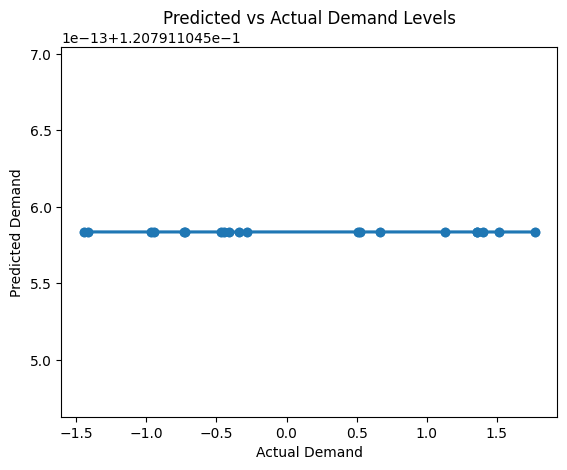

In [384]:
showTestvsPredictions(demand_ytest, svr_demand_ypred, 
                      'Actual Demand', 'Predicted Demand', 
                      'Predicted vs Actual Demand Levels')

#### Decision Tree Regressor

In [385]:
demand_tree = DecisionTreeRegressor(max_depth=1, random_state=42)
demand_tree.fit(demand_xtrain, demand_ytrain)

DecisionTreeRegressor(max_depth=1, random_state=42)

In [386]:
tree_demand_ypred = demand_tree.predict(demand_xtest)
tree_demand_rmse, tree_demand_r2 = getMetrics(demand_ytest, tree_demand_ypred)
print("Demand rmse: ", tree_demand_rmse)
print("demand r2: ", tree_demand_r2)

Demand rmse:  1.083858991512478
demand r2:  -0.1246242799019186


## Inventory Metrics

In [34]:
#EOQ Optimization

eoq_supply_data = pd.DataFrame(columns=['demand', 'ordering_cost', 'holding_cost'])
eoq_supply_data['demand']=supply_data['number_of_products_sold']
eoq_supply_data['ordering_cost']=supply_data['shipping_costs']


In [35]:
#Calculate approximate holding cost

def get_holding_cost(row):
    return ((row['costs']/row['order_quantities'])*0.25)

eoq_supply_data['holding_cost'] = supply_data.apply(get_holding_cost, axis=1)

print(eoq_supply_data)

    demand  ordering_cost  holding_cost
0      802       2.956572      0.488938
1      736       9.716575      3.399092
2        8       8.054479      0.403183
3       83       1.729569      1.079560
4      871       3.890548      4.122503
..     ...            ...           ...
95     672       8.630339      7.489079
96     324       5.352878      1.474548
97      62       7.904846     33.758276
98     913       1.409801      8.168508
99     627       1.311024      0.892979

[100 rows x 3 columns]


In [36]:
#Calculate EOQ
def get_eoq(row):
    return (math.sqrt((2*row['demand']*row['ordering_cost'])/row['holding_cost']))

eoq_supply_data['eoq']= eoq_supply_data.apply(get_eoq, axis=1)
print(eoq_supply_data)

supply_data['eoq']= eoq_supply_data['eoq']

    demand  ordering_cost  holding_cost        eoq
0      802       2.956572      0.488938  98.484903
1      736       9.716575      3.399092  64.867784
2        8       8.054479      0.403183  17.878366
3       83       1.729569      1.079560  16.307956
4      871       3.890548      4.122503  40.546090
..     ...            ...           ...        ...
95     672       8.630339      7.489079  39.354948
96     324       5.352878      1.474548  48.501115
97      62       7.904846     33.758276   5.388494
98     913       1.409801      8.168508  17.752435
99     627       1.311024      0.892979  42.907525

[100 rows x 4 columns]


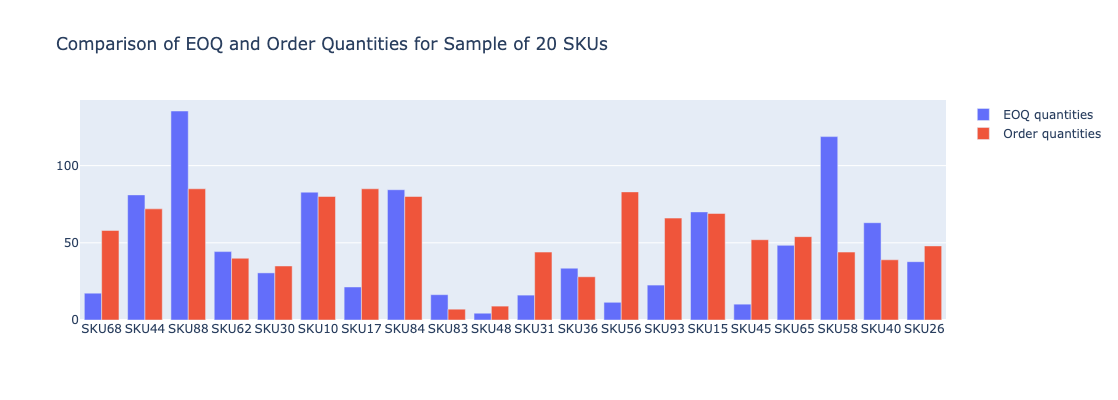

In [37]:
import plotly.graph_objects as go
supply_data_samples = supply_data.sample(n=20)


fig = go.Figure(data=[go.Bar(
    name = 'EOQ quantities',
    x = supply_data_samples['sku'],
    y = supply_data_samples['eoq']
   ), go.Bar(
    name = 'Order quantities',
    x = supply_data_samples['sku'],
    y = supply_data_samples['order_quantities']
   )
])


fig.update_layout(
    title="Comparison of EOQ and Order Quantities for Sample of 20 SKUs",
    height=400,
    width=1000
)

fig.show()

Observations
- It looks like for most SKUs in this sample, the order quantities and EOQs are within 50 units of each other. The largest difference in this sample is 80. This shows there isn't a significant discrepancy and order quantities are in tune with cost efficiency and meeting demand.
- EOQs skew in both directions (greater and smaller than currently ordered quantities), so the approach of adjusting order quantities has to be taken on a case-by-case basis.
- Order quantities could also depend on what the supplier offers, so exact matches may be difficult to obtain.

count    100.000000
mean      25.533775
std       91.982184
min        0.090909
25%        4.326471
50%        8.566776
75%       18.019608
max      904.000000
Name: days_between_orders, dtype: float64


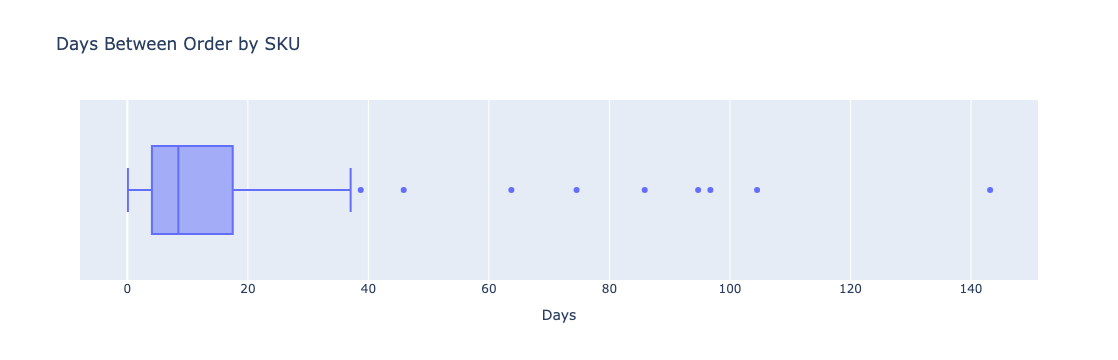

In [38]:
def get_days_between_orders(row):
    return (row['number_of_products_sold']/row['order_quantities'])
supply_data['days_between_orders']= supply_data.apply(get_days_between_orders, axis=1)

print(supply_data['days_between_orders'].describe())

#drop extreme outlier data
edited_supply_data = supply_data[supply_data['sku'] != 'SKU74']

fig = px.box(edited_supply_data, 
             x='days_between_orders',
             title='Days Between Order by SKU', 
             labels={'days_between_orders': 'Days', 'sku': 'SKU'},
             )
fig.show()

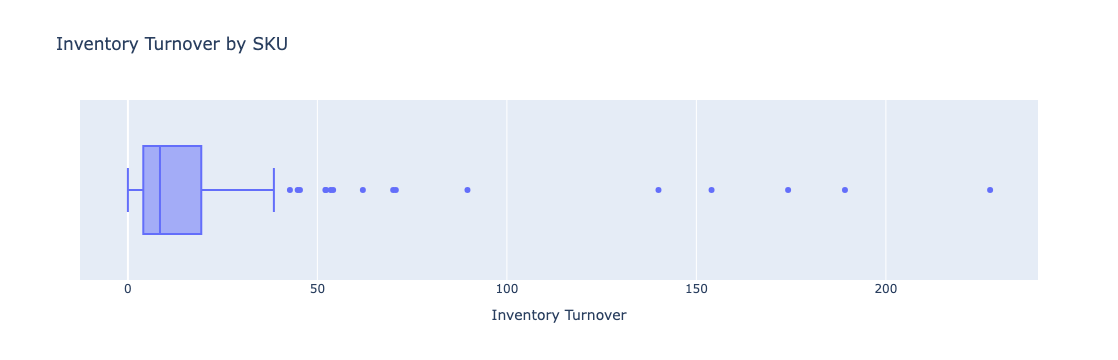

In [39]:
def get_inventory_turnover(row):
    if row['stock_levels'] == 0:
        return 0
    else:
        return (row['number_of_products_sold']/row['stock_levels'])
    
supply_data['inventory_turnover_rate']=supply_data.apply(get_inventory_turnover, axis=1)

edited_supply_data_1 = supply_data[supply_data['sku'] != 'SKU34']

fig = px.box(edited_supply_data_1, 
             x='inventory_turnover_rate',
             title='Inventory Turnover by SKU', 
             labels={'inventory_turnover_rate': 'Inventory Turnover', 'sku': 'SKU'},
             )
fig.show()

Observations
- the median is around 8 days, with Q3 stopping at 18 days. There are several outlier that mostly span from 40 to 150 days.
- Pretty short timespan shows that customers are purchasing frequently, leading to higher turnaround. It could also indicate that the business is efficienty stocking and selling inventory. Indicative of the Just-in-time lead operations strategy.
- This leads to greater risk of stock-outs, since customers could demand more than is in stock.

The overall inventory turnover rates and days between orders match pretty well. It looks like the majority of products turn in about 8.5 days, which is the same as the days between orders. It should be noted that there should be excess inventory to keep up with demand during order shipping periods. However, in general, it looks like there is efficient management of inventory and excess inventory stock is not an issue. Losing out on demand however, could be an issue and should be monitored. It may benefit the company to look into increasing order quantities or decreasing days between orders.

### Stock Level Predictions

In [388]:
stock_columns = ['sku', 'price', 'revenue_generated', 'customer_lead_time', 'shipping_times', 'shipping_costs', 
                       'supplier_lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs',
                      'inspection_results', 'defect_rates', 'costs', 'stock_levels']
stock_supply_data = convertData(stock_columns, std_supply_data)
stock_supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sku                      100 non-null    int64  
 1   price                    100 non-null    float64
 2   revenue_generated        100 non-null    float64
 3   customer_lead_time       100 non-null    float64
 4   shipping_times           100 non-null    float64
 5   shipping_costs           100 non-null    float64
 6   supplier_lead_time       100 non-null    float64
 7   production_volumes       100 non-null    float64
 8   manufacturing_lead_time  100 non-null    float64
 9   manufacturing_costs      100 non-null    float64
 10  inspection_results       100 non-null    int64  
 11  defect_rates             100 non-null    float64
 12  costs                    100 non-null    float64
 13  stock_levels             100 non-null    float64
dtypes: float64(12), int64(2)
me

In [389]:
stock_xtrain, stock_xtest, stock_ytrain, stock_ytest = getTrainTestSets(stock_supply_data, 
                                                                            'stock_levels')
stock_xtrain.info()
stock_ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sku                      80 non-null     int64  
 1   price                    80 non-null     float64
 2   revenue_generated        80 non-null     float64
 3   customer_lead_time       80 non-null     float64
 4   shipping_times           80 non-null     float64
 5   shipping_costs           80 non-null     float64
 6   supplier_lead_time       80 non-null     float64
 7   production_volumes       80 non-null     float64
 8   manufacturing_lead_time  80 non-null     float64
 9   manufacturing_costs      80 non-null     float64
 10  inspection_results       80 non-null     int64  
 11  defect_rates             80 non-null     float64
 12  costs                    80 non-null     float64
dtypes: float64(11), int64(2)
memory usage: 8.8 KB
<class 'pandas.core.series.Series'>
Inde

#### Data Exploration

In [390]:
#dummy model to test to check if models are underperforming
dummy = DummyRegressor(strategy='mean')
dummy.fit(stock_xtrain, stock_ytrain)
y_dummy_pred = dummy.predict(stock_xtest)

dummy_rmse = root_mean_squared_error(stock_ytest, y_dummy_pred)
dummy_r2 = r2_score(stock_ytest, y_dummy_pred)
print("Baseline RMSE:", dummy_rmse)
print("Baseline R-squared:", dummy_r2)

Baseline RMSE: 1.0735720602042744
Baseline R-squared: -0.0014785189000676713


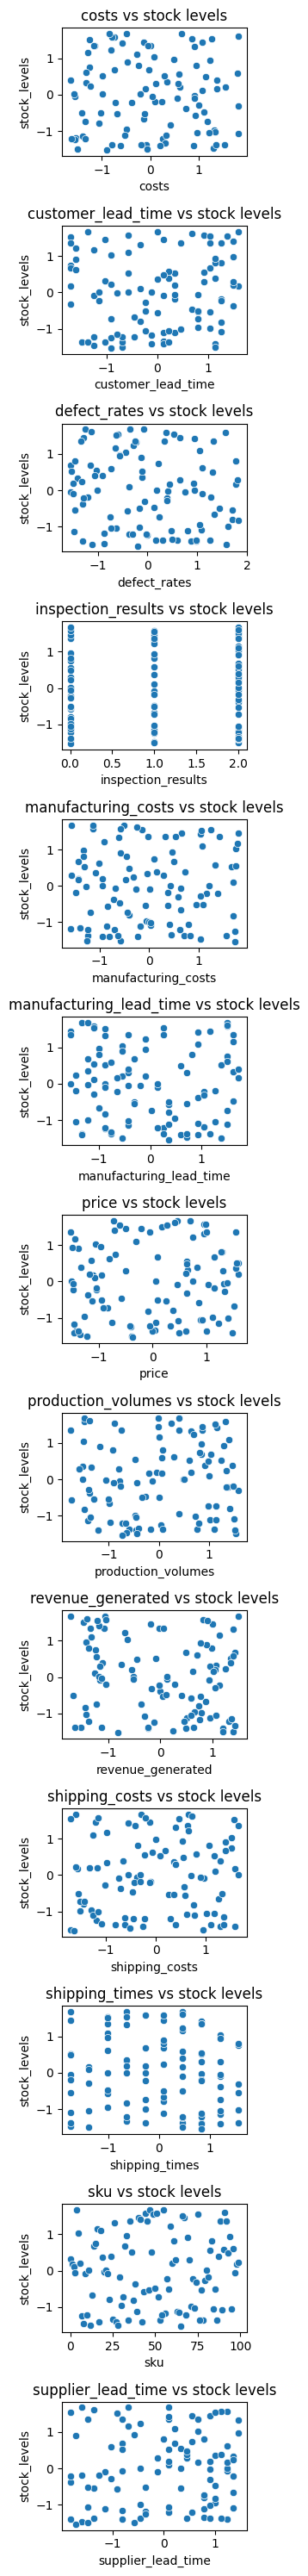

In [391]:
plt.figure(figsize=(3, 30))

# Loop through each feature and create a vertically aligned scatter plot
for i, feature in enumerate(stock_supply_data.columns.difference(['stock_levels'])):
    plt.subplot(len(stock_supply_data.columns.difference(['stock_levels'])), 1, i+1)
    sns.scatterplot(x=stock_supply_data[feature], y=stock_supply_data['stock_levels'])
    plt.xlabel(feature)
    plt.ylabel('stock_levels')
    plt.title(f'{feature} vs stock levels')

# Display the plots
plt.tight_layout()
plt.show()

#### Linear Regression

In [392]:
ols.fit(stock_xtrain, stock_ytrain)

LinearRegression()

In [394]:
coefficients = ols.coef_
intercept = ols.intercept_
feature_names = stock_xtrain.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

sku: 0.0025784395761738526
price: 0.05178364013489259
revenue_generated: -0.13156940758256777
customer_lead_time: 0.03538899734521452
shipping_times: -0.08719996846480947
shipping_costs: 0.09827734413095898
supplier_lead_time: 0.10973437275028673
production_volumes: 0.017190445731436563
manufacturing_lead_time: -0.040729629289643236
manufacturing_costs: -0.014421821734294049
inspection_results: 0.08519908921342231
defect_rates: -0.15780503353630418
costs: -0.06305219661352325


In [397]:
ols_stock_ypred = ols.predict(stock_xtest)
ols_stock_rmse, ols_stock_r2 = getMetrics(stock_ytest, ols_stock_ypred)
print("Stock rmse: ", ols_stock_rmse)
print("Stock r2: ", ols_stock_r2)

Stock rmse:  0.9711615419262684
Stock r2:  0.18047503205382698


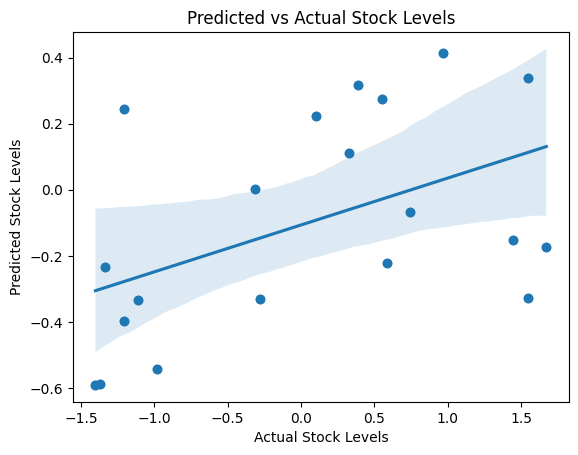

In [398]:
showTestvsPredictions(stock_ytest, ols_stock_ypred, 
                      'Actual Stock Levels', 'Predicted Stock Levels', 
                      'Predicted vs Actual Stock Levels')

#### Support Vector Regression

In [523]:
stock_svr = SVR(kernel='rbf', C=50, epsilon=0.01)

#train the model
stock_svr.fit(stock_xtrain, stock_ytrain)

SVR(C=50, epsilon=0.01)

In [524]:
svr_stock_ypred = stock_svr.predict(stock_xtest)
svr_stock_rmse, svr_stock_r2 = getMetrics(stock_ytest, svr_stock_ypred)
print("Stock rmse: ", svr_stock_rmse)
print("Stock r2: ", svr_stock_r2)

Stock rmse:  1.0198595158952897
Stock r2:  0.09622579356787819


#### Decision Tree Regression

In [547]:
stock_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
stock_tree.fit(stock_xtrain, stock_ytrain)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [548]:
#Get prediction from test set
tree_stock_ypred = stock_tree.predict(stock_xtest)
tree_stock_rmse, tree_stock_r2 = getMetrics(stock_ytest, tree_stock_ypred)
print("Stock rmse: ", tree_stock_rmse)
print("Stock r2: ", tree_stock_r2)

Stock rmse:  1.240103235363016
Stock r2:  -0.3362721546334946


## Procurement and Production Metrics

#### Supplier by revenue generated

  supplier_name  revenue_generated
0    Supplier 1        5834.407224
1    Supplier 2        5703.064482
2    Supplier 3        6519.731976
3    Supplier 4        4803.831211
4    Supplier 5        6130.192425


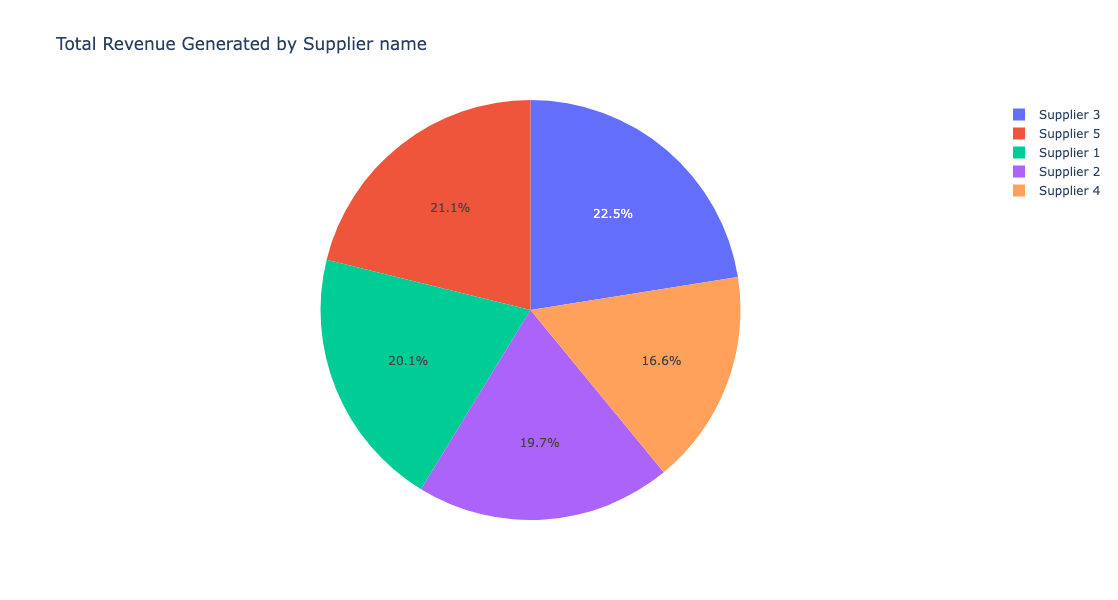

In [606]:
g1 = supply_data.groupby(['supplier_name'])['revenue_generated'].mean().reset_index()
print(g4)

fig = px.pie(
    g1,
    values = 'revenue_generated',
    names = 'supplier_name',
    title="Total Revenue Generated by Supplier name",
    labels={'revenue_generated': 'Revenue Generated', 'supplier_name': 'Supplier'}
)

fig.update_layout(
    width=600,
    height=600
)

fig.show()

#### Suppliers by total profit and number of products sold

['cosmetics' 'haircare' 'skincare']
   product_type supplier_name  total_profits
0     cosmetics    Supplier 1   29605.630578
1     cosmetics    Supplier 2   41563.093902
2     cosmetics    Supplier 3    7509.682624
3     cosmetics    Supplier 4   22688.696172
4     cosmetics    Supplier 5   46787.765440
5      haircare    Supplier 1   24901.371608
6      haircare    Supplier 2   51843.498333
7      haircare    Supplier 3   26549.917737
8      haircare    Supplier 4   37087.176134
9      haircare    Supplier 5   16744.563928
10     skincare    Supplier 1   87501.012108
11     skincare    Supplier 2   20730.227072
12     skincare    Supplier 3   56704.377754
13     skincare    Supplier 4   17300.501976
14     skincare    Supplier 5   37162.725156


/var/folders/lm/l86zt3r51rq7110601lpcfj80000gn/T/ipykernel_79148/187644544.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



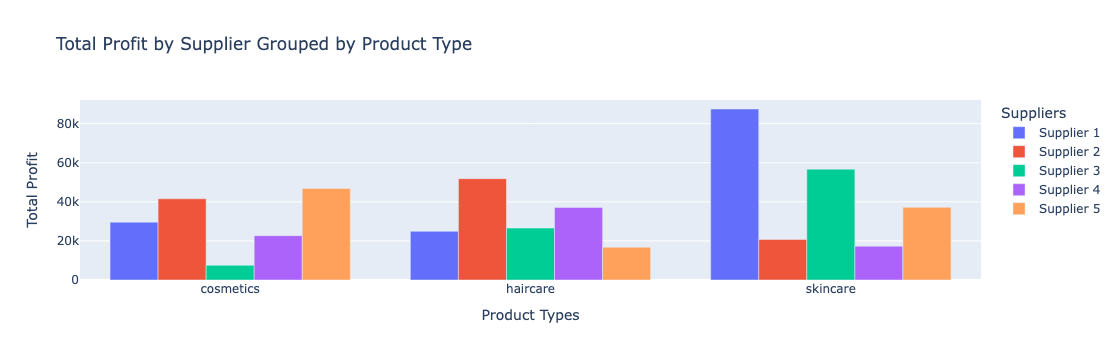

In [596]:
g2 = supply_data.groupby(['product_type', 'supplier_name']).apply(get_profit).reset_index()
print(g2['product_type'].unique())
g2 = g2.rename(columns={0:'total_profits'})
print(g2)

fig = px.bar(
    g2,
    x='product_type',
    y='total_profits',
    color='supplier_name',
    barmode='group',
    title='Total Profit by Supplier Grouped by Product Type',
    labels={'total_profits': 'Total Profit', 'product_type': 'Product Types', 'supplier_name': 'Suppliers'},
)

fig.show()

  supplier_name  defect_rates
0    Supplier 1      1.803630
1    Supplier 2      2.362750
2    Supplier 3      2.465786
3    Supplier 4      2.337397
4    Supplier 5      2.665408


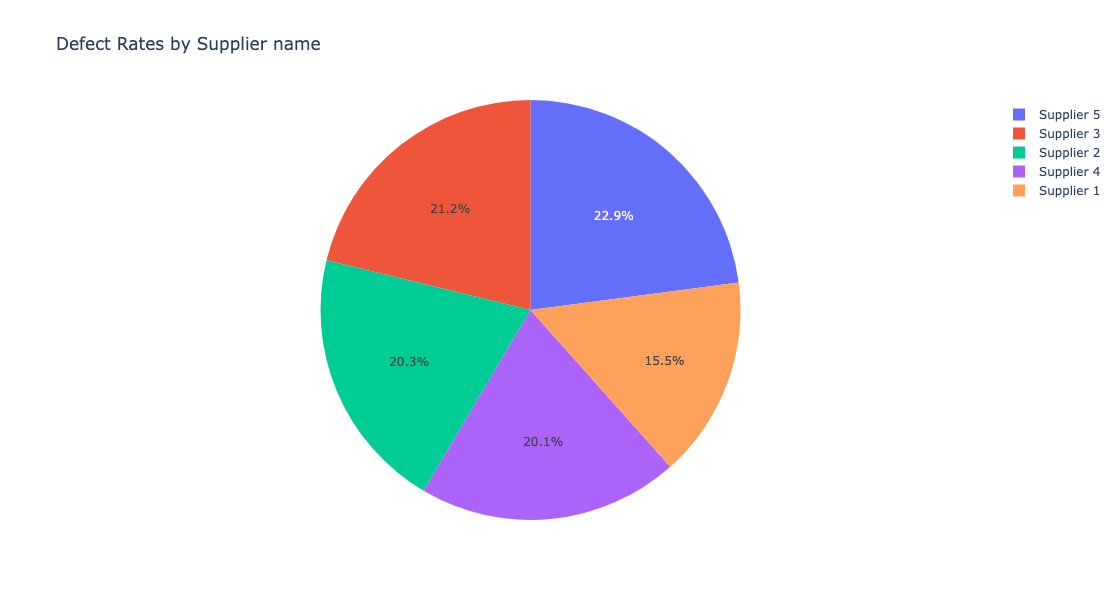

In [608]:
g3 = supply_data.groupby(['supplier_name'])['defect_rates'].mean().reset_index()
print(g3)

fig = px.pie(
    g3,
    values = 'defect_rates',
    names = 'supplier_name',
    title="Defect Rates by Supplier name",
    labels={'defect_rates': 'Defect Rates', 'supplier_name': 'Supplier'}
)

fig.update_layout(
    width=600,
    height=600
)

fig.show()

inspection_results supplier_name  Fail  Pass  Pending
0                     Supplier 1     6    13        8
1                     Supplier 2     8     5        9
2                     Supplier 3     3     2       10
3                     Supplier 4    12     0        6
4                     Supplier 5     7     3        8


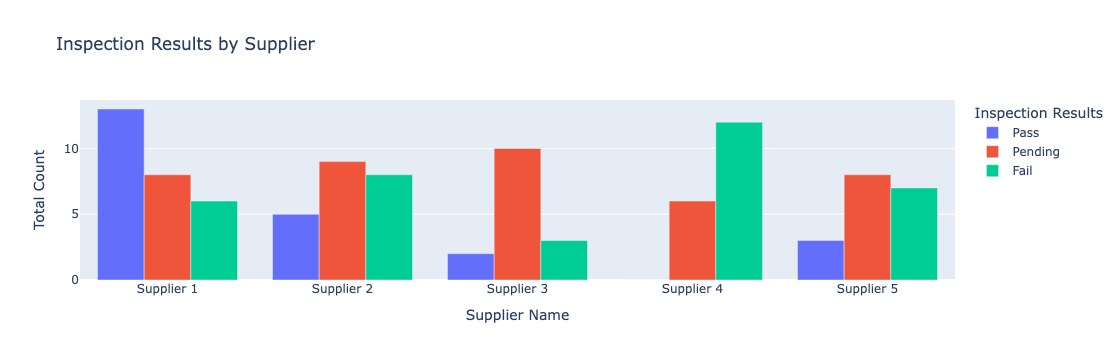

In [616]:
g4 = supply_data.groupby('supplier_name')['inspection_results'].value_counts().unstack(fill_value=0).reset_index()
print(g4)

g4_long = g4.melt(id_vars='supplier_name', value_vars=['Pass', 'Pending', 'Fail'],
                                                var_name='inspection_results', value_name='count')

# Create a grouped bar chart using Plotly
fig = px.bar(g4_long, x='supplier_name', y='count', color='inspection_results', barmode='group',
             labels={'supplier_name': 'Supplier Name', 'count': 'Total Count', 'inspection_results': 'Inspection Results'},
             title='Inspection Results by Supplier')

# Show the plot
fig.show()

### Defect Rate Predictions

In [636]:
defect_rate_columns = ['supplier_name', 'production_volumes', 'manufacturing_lead_time', 
                       'manufacturing_costs', 'shipping_costs', 'supplier_lead_time', 
                       'transportation_modes', 'defect_rates']
dr_supply_data = convertData(defect_rate_columns, std_supply_data)
dr_supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   supplier_name            100 non-null    int64  
 1   production_volumes       100 non-null    float64
 2   manufacturing_lead_time  100 non-null    float64
 3   manufacturing_costs      100 non-null    float64
 4   shipping_costs           100 non-null    float64
 5   supplier_lead_time       100 non-null    float64
 6   transportation_modes     100 non-null    int64  
 7   defect_rates             100 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 6.4 KB


In [637]:
dr_xtrain, dr_xtest, dr_ytrain, dr_ytest = getTrainTestSets(dr_supply_data, 'defect_rates')
print(dr_xtrain.info())
print(dr_ytrain.info())

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   supplier_name            80 non-null     int64  
 1   production_volumes       80 non-null     float64
 2   manufacturing_lead_time  80 non-null     float64
 3   manufacturing_costs      80 non-null     float64
 4   shipping_costs           80 non-null     float64
 5   supplier_lead_time       80 non-null     float64
 6   transportation_modes     80 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 5.0 KB
None
<class 'pandas.core.series.Series'>
Index: 80 entries, 55 to 51
Series name: defect_rates
Non-Null Count  Dtype  
--------------  -----  
80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB
None


#### Data Exploration

In [638]:
#dummy model to test to check if models are underperforming
dummy = DummyRegressor(strategy='mean')
dummy.fit(dr_xtrain, dr_ytrain)
y_dummy_pred = dummy.predict(dr_xtest)

dummy_rmse = root_mean_squared_error(dr_ytest, y_dummy_pred)
dummy_r2 = r2_score(dr_ytest, y_dummy_pred)
print("Baseline RMSE:", dummy_rmse)
print("Baseline R-squared:", dummy_r2)

Baseline RMSE: 0.721477631417124
Baseline R-squared: -0.000543062918938686


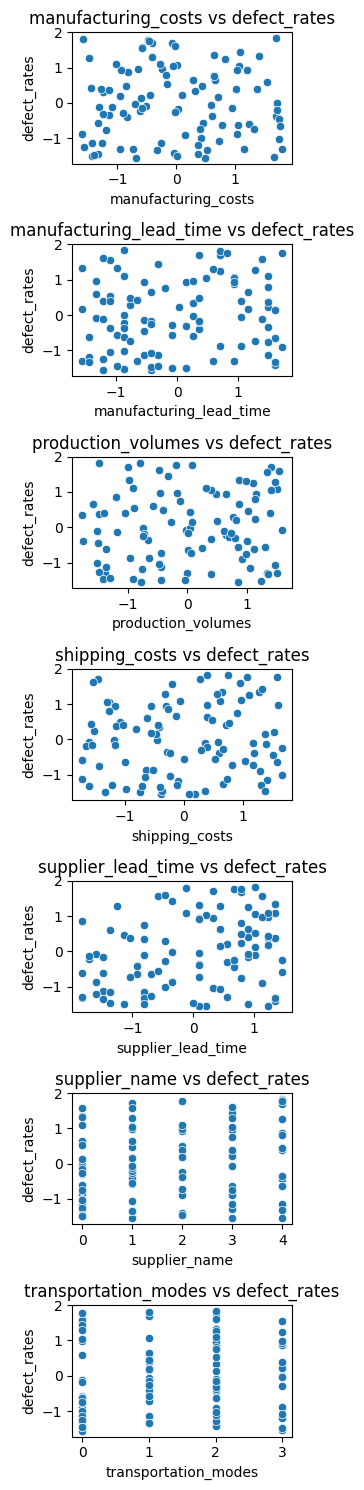

In [639]:
plt.figure(figsize=(3, 15))

# Loop through each feature and create a vertically aligned scatter plot
for i, feature in enumerate(dr_supply_data.columns.difference(['defect_rates'])):
    plt.subplot(len(dr_supply_data.columns.difference(['defect_rates'])), 1, i+1)
    sns.scatterplot(x=dr_supply_data[feature], y=dr_supply_data['defect_rates'])
    plt.xlabel(feature)
    plt.ylabel('defect_rates')
    plt.title(f'{feature} vs defect_rates')

# Display the plots
plt.tight_layout()
plt.show()

In [640]:
vif_data = pd.DataFrame()
vif_data["feature"] = dr_supply_data.columns
vif_data["VIF"] = [variance_inflation_factor(dr_supply_data.values, i) for i in range(len(dr_supply_data.columns))]
print(vif_data)

                   feature       VIF
0            supplier_name  1.950312
1       production_volumes  1.112265
2  manufacturing_lead_time  1.126543
3      manufacturing_costs  1.068241
4           shipping_costs  1.034249
5       supplier_lead_time  1.167708
6     transportation_modes  1.942254
7             defect_rates  1.143292


Observations
- models are not capturing the correct patterns in data. This could be due to the fact that input features and target variable is weak, not well-defined.
- defect rate values are highly variable or noisy.
- The features are not predicive of derect rates.
To approach this better, it's important to increase feature enginerring and try different modeling approaches.

#### Linear Regression

In [641]:
ols.fit(dr_xtrain, dr_ytrain)

LinearRegression()

In [642]:
coefficients = ols.coef_
intercept = ols.intercept_
feature_names = dr_xtrain.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

supplier_name: 0.045170565168174005
production_volumes: 0.05556462524783462
manufacturing_lead_time: 0.2948145844023839
manufacturing_costs: 0.07392817332819487
shipping_costs: 0.23192422450124986
supplier_lead_time: 0.4657626238640541
transportation_modes: 0.17915240856423265


This shows that the supplier is the least correlated, while shipping costs are the most relevant to understanding defect rates. This is likely due to the fact that the higher the shipping costs, the further away materials/items are being shipped from and therefore more likely to incur defects.
Production volumes is also important, as the more products are produced together, the more likely a defect might occur. Manufacturing lead time and costs, as well as the transportation mode and supplier lead time, are also relevant.

In [643]:
#prediction on test set
ols_dr_ypred = ols.predict(dr_xtest)
ols_dr_rmse, ols_dr_r2 = getMetrics(dr_ytest, ols_dr_ypred)
print("Stock RMSE: ", ols_dr_rmse)
print("Stock R2: ", ols_dr_r2)


Stock RMSE:  1.2613963398148933
Stock R2:  -2.0583921934497633


Linear regression is not suited for this data. The relationship between features and target variable may be nonlinear, or model is not too simple.
- Ridge and Lasso methods were also tested, and they did not produce much improved results

#### Support Vector Regression with RBF Kernel

In [671]:
dr_svr = SVR(kernel='rbf', C=0.01, epsilon=0.01)

#train the model
dr_svr.fit(dr_xtrain, dr_ytrain)

SVR(C=0.01, epsilon=0.01)

In [672]:
#prediction on test set
svr_dr_ypred = dr_svr.predict(dr_xtest)
svr_dr_rmse, svr_dr_r2 = getMetrics(dr_ytest, svr_dr_ypred)
print("Stock RMSE: ", svr_dr_rmse)
print("Stock R2: ", svr_dr_r2)

Stock RMSE:  0.7300393172757992
Stock R2:  -0.0244306038185933


This made an improvement to the RMSE and R squared scores, although the rsquared still indicates that the features do not accurately predict the variance of defect rates. The root mean squared error is above one, so it means the model is not correctly capturing the pattern between independent and dependent variables.

#### Decision Tree Regression

In [682]:
dr_tree = DecisionTreeRegressor(max_depth=1, random_state=42)
dr_tree.fit(dr_xtrain, dr_ytrain)

DecisionTreeRegressor(max_depth=1, random_state=42)

In [683]:
#Get prediction from test set
tree_dr_ypred = dr_tree.predict(dr_xtest)
tree_dr_rmse, tree_dr_r2 = getMetrics(dr_ytest, tree_dr_ypred)

print("Stock RMSE: ", tree_dr_rmse)
print("Stock R2: ", tree_dr_r2)

Stock RMSE:  0.9258497264361008
Stock R2:  -0.6476730895888225


#### Recursive feature elimination

In [76]:
rfe_dr_supply_data = pd.DataFrame(std_supply_data)

In [77]:
# Recursive feature elimination
def getTrainTestSetsRFE(data, rfe):
    x = data.drop(columns=['defect_rates'])
    y = data['defect_rates']
    x = rfe.fit_transform(x, y)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    return [x_train, x_test, y_train, y_test]


In [78]:
forest = RandomForestRegressor(n_estimators=100)
svr_linear = SVR(kernel='linear')

rfe = RFE(estimator=ols, n_features_to_select=5)
rfe_dr_xtrain, rfe_dr_xtest, rfe_dr_ytrain, rfe_dr_ytest = getTrainTestSetsRFE(rfe_dr_supply_data, rfe)

In [79]:
support = rfe.support_

In [80]:
ranking = rfe.ranking_

In [81]:
feature_names = rfe_dr_supply_data.columns
for feature, support, ranking in zip(feature_names, support, ranking):
    print(f"{feature}: \nsupport: {support} ranking: {ranking}")

product_type: 
support: False ranking: 17
sku: 
support: False ranking: 19
price: 
support: True ranking: 1
availability: 
support: False ranking: 13
number_of_products_sold: 
support: False ranking: 7
revenue_generated: 
support: False ranking: 4
customer_demographics: 
support: False ranking: 10
stock_levels: 
support: False ranking: 2
customer_lead_time: 
support: False ranking: 9
order_quantities: 
support: False ranking: 18
shipping_times: 
support: False ranking: 5
shipping_carriers: 
support: False ranking: 16
shipping_costs: 
support: False ranking: 3
supplier_name: 
support: False ranking: 11
location: 
support: False ranking: 15
supplier_lead_time: 
support: True ranking: 1
production_volumes: 
support: False ranking: 8
manufacturing_lead_time: 
support: True ranking: 1
manufacturing_costs: 
support: False ranking: 14
inspection_results: 
support: True ranking: 1
defect_rates: 
support: True ranking: 1
transportation_modes: 
support: False ranking: 6
routes: 
support: False r

By recursively iterating through the features using RFE, it looks like the 5 most relevant features are price, supplier lead time, manufacturing lead time, inspection results, and transportation modes. I had chosen supplier lead time, transportation lead time, and manufacturing lead time in my initial feature selections, but had overlooked the rest.

In [66]:
ols.fit(rfe_dr_xtrain, rfe_dr_ytrain)

LinearRegression()

In [67]:
ols_rfe_dr_ypred = ols.predict(rfe_dr_xtest)

In [68]:
rmse_rfe = root_mean_squared_error(rfe_dr_ytest, ols_rfe_dr_ypred)
r_squared_rfe = r2_score(rfe_dr_ytest, ols_rfe_dr_ypred)

print(f"RMSE for RBF SVR: {rmse_rfe}")
print(f"R squared for RBF SVR: {r_squared_rfe}")

RMSE for RBF SVR: 1.014305314225261
R squared for RBF SVR: -0.12257920009697232


Model performed better with RFE (5 features). Features chosen were:
- Availability
- Production volumes
- Manufacturing costs
- Transportation modes
- Routes

## Testing LGBoost Neural Network for Demand Forecasting

In [105]:
demand_columns = ['price', 'availability', 'stock_levels', 'customer_lead_time', 'order_quantities', 'number_of_products_sold']
demand_supply_data = convertData(demand_columns, encoded_supply_data)

rmse_scores = []
r2_scores = []

In [109]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [116]:
x = demand_supply_data.drop(columns=['number_of_products_sold'])
y = demand_supply_data['number_of_products_sold']

In [119]:
params = {
    'objective': 'regression',
    'metric': 'mean_squared_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [134]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    train_data = lgb.Dataset(x_train, label=y_train)
    test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

    bst = lgb.train(
        params,
        train_data,
        num_boost_round=50,
        valid_sets=[test_data],
    )

    y_pred = bst.predict(x_test, num_iteration=bst.best_iteration)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate the target range
    target_range = np.max(y_test) - np.min(y_test)

    # Calculate metrics as percentages
    percentage_rmse = (rmse / target_range) * 100
    percentage_r2 = (r2 * 100)

    # Append the scores to the respective lists
    rmse_scores.append(percentage_rmse)
    r2_scores.append(percentage_r2)


    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 5
[LightGBM] [Info] Start training from score 449.877778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [135]:
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Print the results
print(f"Average Root Mean Squared Error: {avg_rmse:.2f}%")
print(f"Average R-squared: {avg_r2:.2f}%")

Average Root Mean Squared Error: 36.40%
Average R-squared: -15.71%
